## Limpieza de Datos (Data Cleaning)

Esta etapa tiene como objetivo fundamental garantizar que los datos estén en un formato apropiado y sean consistentes para su análisis posterior.<br />

En primer lugar, se realizó la importación de las librerías de Python necesarias. Posteriormente, se llevó a cabo la lectura del conjunto de datos, y a continuación, se ejecutaron una serie de instrucciones en nuestro entorno Python 3. Estas instrucciones fueron diseñadas para realizar la limpieza y el preprocesamiento esencial de los datos, asegurando así su calidad y coherencia para las fases subsiguientes del análisis.
<br />



#### Importar librerías

In [1]:
import pandas as pd #Librería para manipulación y análisis de datos.
import numpy as np #Librería para operaciones matriciales y numéricas en Python. 
import matplotlib.pyplot as plt #Parte de Matplotlib, es una librería para crear visualizaciones estáticas, animadas e interactivas en Python.
import seaborn as sns #Basada en Matplotlib, es una librería de visualización de datos estadísticos.
import missingno as msno #Librería para visualizar patrones de datos faltantes o nulos. 
import inflection #Librería para convertir entre distintos estilos de nombres de variables
import warnings #Librería estándar de Python que gestiona advertencias durante la ejecución del código. 

# Permite mostrar figuras de matplotlib en el entorno de Jupyter Notebook
%matplotlib inline

# Ignorar las advertencias de Seaborn
warnings.filterwarnings("ignore")

#### Carga del archivo

El equipo Henry proporcionó un archivo en formato CSV denominado *'ML_cars'*, que decidimos renombrar como *'original_dataset.csv'* para mayor claridad. Este archivo fue almacenado en GitHub para facilitar el acceso y la colaboración.

La carga del archivo se llevó a cabo leyendo el archivo CSV desde la URL correspondiente. Se utilizó la codificación UTF-8 debido a su amplia compatibilidad y capacidad para manejar caracteres especiales de manera efectiva. Los datos se almacenaron en un DataFrame de Pandas denominado *'cars'*.

In [2]:
url = 'https://raw.githubusercontent.com/JohannaRangel/ML_MarketAnalysis-AutomotrizChina/main/data/original_dataset.csv'

try:
    cars = pd.read_csv(url, encoding='utf-8')
    print("El archivo se abrió correctamente con UTF-8.")
    cars.head()
except UnicodeDecodeError:
    print("Error: No se pudo abrir el archivo con UTF-8. Intenta con otra codificación.")


El archivo se abrió correctamente con UTF-8.


#### Vista previa rápida de los primeros registros

In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Estadísticas generales del conjunto de datos

In [11]:
print("-----------------------------------------------")
print("\nEstadísticas generales del conjunto de datos ")
print("-----------------------------------------------")
print(cars.info())

-----------------------------------------------

Estadísticas generales del conjunto de datos 
-----------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  


#### Número de variables y observaciones

In [12]:
num_variables = cars.shape[1]
num_observations = cars.shape[0]
print(f"\nNúmero de variables: {num_variables}")
print(f"\nNúmero de observaciones: {num_observations}")


Número de variables: 26

Número de observaciones: 205


#### Filas duplicadas

In [13]:
duplicate_rows = cars[cars.duplicated()]
num_duplicate_rows = duplicate_rows.shape[0]
print(f"\nFilas duplicadas: {num_duplicate_rows}")


Filas duplicadas: 0


#### Registros Nulos

In [14]:
null_counts = cars.isnull().sum()
print("----------------------------------------")
print("Cantidad de registros nulos por columna ")
print("----------------------------------------")
print(null_counts)

----------------------------------------
Cantidad de registros nulos por columna 
----------------------------------------
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


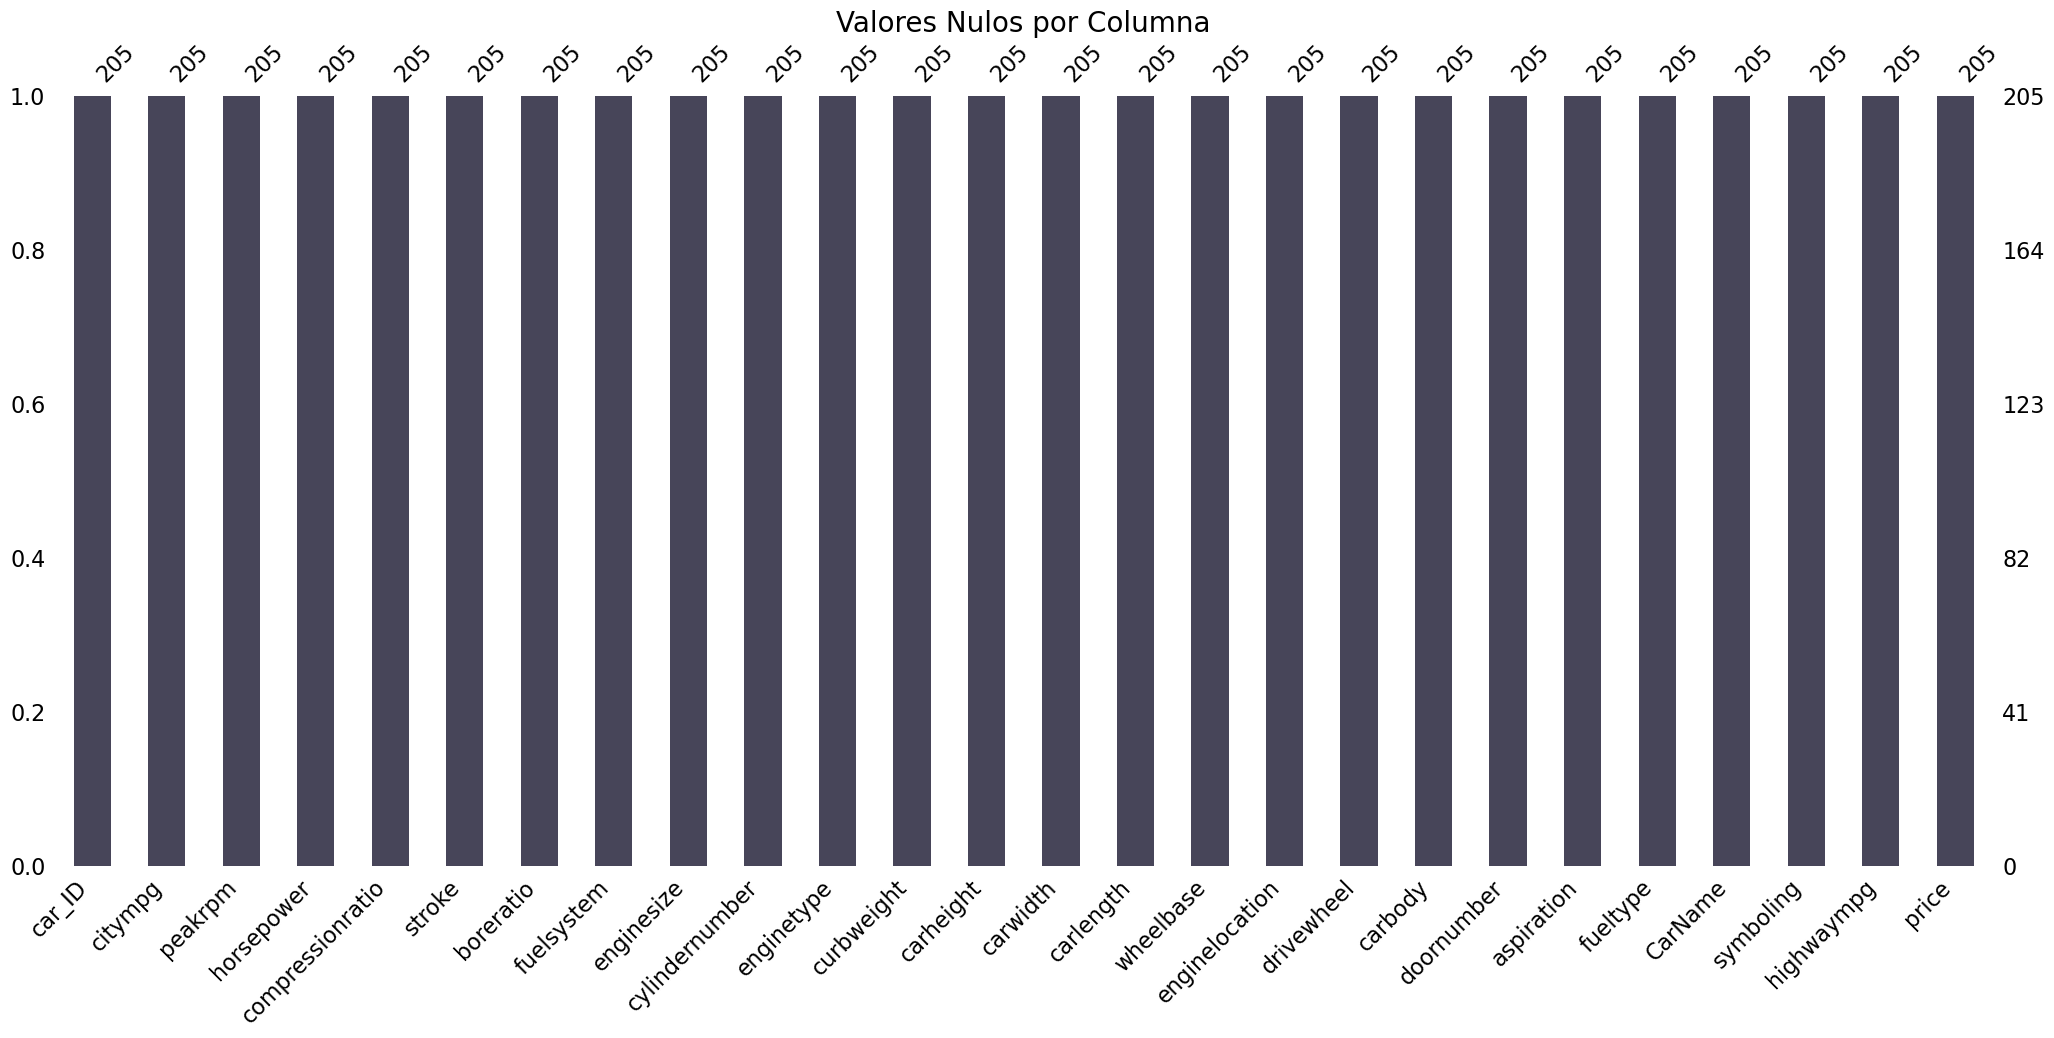

In [15]:
# Visualización de valores nulos por columna
msno.bar(cars, color='#474559', fontsize=16, labels=True, p=0, sort='ascending')
plt.title('Valores Nulos por Columna', fontsize=20)
plt.show()

#### Tipos de variables

In [19]:
column_types = cars.dtypes

numeric_count = sum(column_types.isin([int, float]))
text_count = sum(column_types == object)
categorical_count = sum(column_types == 'category')

discrete_columns = cars.select_dtypes(include='object').shape[1]
continuous_columns = cars.select_dtypes(include=['int64', 'float64']).shape[1]
all_missing_columns = cars.columns[cars.isnull().all()].shape[0]

print(f"\nNumericas: {numeric_count}")
print(f"\nTexto: {text_count}")
print(f"\nCategoricas: {categorical_count}")
print(f"\nNro.Columnas Discretas: {discrete_columns}")
print(f"\nNro.Columnas Continuas: {continuous_columns}") 


Numericas: 0

Texto: 10

Categoricas: 0

Nro.Columnas Discretas: 10

Nro.Columnas Continuas: 16


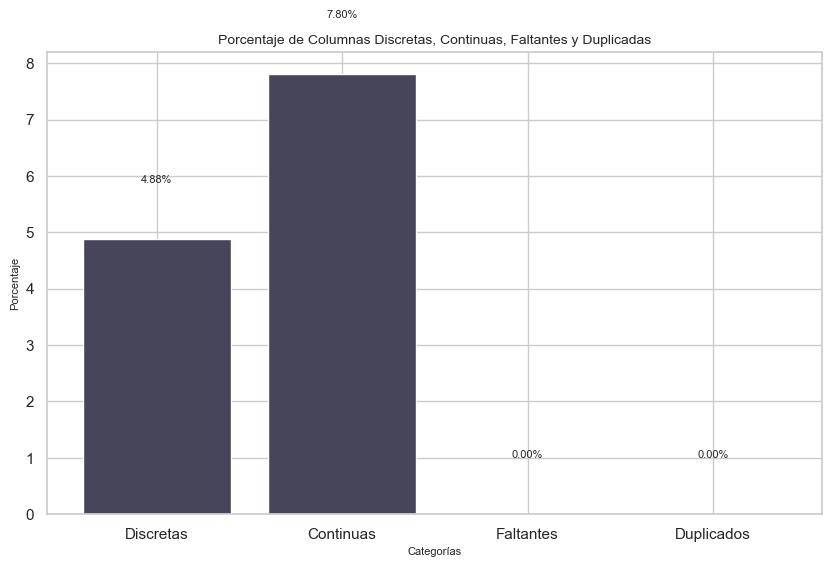

In [25]:
# Calcular porcentajes
percentage_discrete = (discrete_columns / num_observations) * 100
percentage_continuous = (continuous_columns / num_observations) * 100
percentage_all_missing = (all_missing_columns / num_observations) * 100
percentage_num_duplicate_rows = (num_duplicate_rows / num_observations) * 100

# Crear un gráfico de barras
categories = ['Discretas', 'Continuas', 'Faltantes', 'Duplicados']
percentages = [percentage_discrete, percentage_continuous, percentage_all_missing, percentage_num_duplicate_rows]

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, percentages, color=['#474559'])
plt.title('Porcentaje de Columnas Discretas, Continuas, Faltantes y Duplicadas', fontsize=10)
plt.xlabel('Categorías', fontsize=8)
plt.ylabel('Porcentaje', fontsize=8)

# Agregar etiquetas con los porcentajes
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.2f}%", ha='center', fontsize=8)

plt.show()

#### Normalización de Nombres de las Columnas

In [21]:
print (f"Nombres originales de las columnas: {cars.columns}/n")

def convert_to_snake_case(column_name):
    return inflection.underscore(column_name)

cars.columns = [convert_to_snake_case(col) for col in cars.columns]

#Creamos el diccionario con los titulos de las columnas que vamos a cambiar
diccionario_columnas = {
    'fueltype': 'fuel_type','doornumber': 'door_number', 'carbody': 'car_body', 'drivewheel': 'drive_wheel',
    'enginelocation': 'engine_location','wheelbase': 'wheel_base','carlength': 'car_length','car_width': '',
    'carheight': 'car_height','curbweight': 'curb_weight','enginetype': 'engine_type','cylindernumber': 'cylinder_number',
    'enginesize': 'engine_size','fuelsystem': 'fuel_system','boreratio': 'bore_ratio','compressionratio': 'compression_ratio',
    'horsepower': 'horse_power','peakrpm': 'peak_rpm','citympg': 'city_mpg','highwaympg': 'highway_mpg','carwidth':"car_width"
}

#Cambiamos los nombres de las columnas
for columna in cars.columns:
    if columna in diccionario_columnas:
        nuevo_nombre = diccionario_columnas[columna]
        cars.rename(columns={columna: nuevo_nombre}, inplace=True)

#Verificamos que los nombres se hallan cambiado 
print(f"\nNuevos nombres de las columnas : {cars.columns}")

Nombres originales de las columnas: Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')/n

Nuevos nombres de las columnas : Index(['car_id', 'symboling', 'car_name', 'fuel_type', 'aspiration',
       'door_number', 'car_body', 'drive_wheel', 'engine_location',
       'wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
       'engine_type', 'cylinder_number', 'engine_size', 'fuel_system',
       'bore_ratio', 'stroke', 'compression_ratio', 'horse_power', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price'],
      dtype='object')


#### Normalización en las Filas

In [27]:
# Redondear la columna 'price' y convertir a enteros
cars['price'] = cars['price'].round().astype(int)

In [31]:
#Transformarmos los nombres de los carros en snake_case en la columna de car_name
cars['car_name'] = cars['car_name'].apply(convert_to_snake_case)
cars['car_name'] = cars['car_name'].str.replace(' ', '_')
cars['car_name'] 

0            alfa_romero_giulia
1           alfa_romero_stelvio
2      alfa_romero_quadrifoglio
3                   audi_100_ls
4                    audi_100ls
                 ...           
200             volvo_145e_(sw)
201                 volvo_144ea
202                 volvo_244dl
203                   volvo_246
204                 volvo_264gl
Name: car_name, Length: 205, dtype: object

In [23]:
# Diccionario de mapeo de valores
mapeo = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 20}

#columna "door_number": número de puertas
print("Columna: door_number")
print("Valores Originales:")
print(cars['door_number'].unique())

cars['door_number'] = cars['door_number'].map(mapeo)

print("\nValores Convertidos a Números:")
print(cars['door_number'])

print()
print("--------------------------------------")

#columna "cylinder_number":número de cilindros del motor
print("Columna: cylinder_number")
print("Valores Originales:")
print(cars['cylinder_number'].unique())

cars['cylinder_number'] = cars['cylinder_number'].map(mapeo)
cars['cylinder_number'] = cars['cylinder_number'].fillna(0)
cars['cylinder_number'] = cars['cylinder_number'].astype(int)

print("\nValores Convertidos a Números:")
print(cars['cylinder_number'])

print()
print("--------------------------------------")

#columna "symboling": es la  de calificación de riesgo
print("Columna: symboling")
print("Valores Originales:")
print(cars['symboling'].unique())

mapeo_calificaciones = {-3: 'Muy Seguro', -2: 'Seguro', -1: 'Poco Seguro', 0: 'Neutral', 1: 'Riesgoso', 2: 'Muy Riesgoso', 3: 'Extremadamente Riesgoso'}

# Mapea las etiquetas a la columna 'symboling'
cars['calificacion_riesgo'] = cars['symboling'].map(mapeo_calificaciones)

print("\nValores Convertidos a Números:")
print(cars['symboling'])

Columna: door_number
Valores Originales:
['two' 'four']

Valores Convertidos a Números:
0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: door_number, Length: 205, dtype: int64

--------------------------------------
Columna: cylinder_number
Valores Originales:
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

Valores Convertidos a Números:
0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylinder_number, Length: 205, dtype: int32

--------------------------------------
Columna: symboling
Valores Originales:
[ 3  1  2  0 -1 -2]

Valores Convertidos a Números:
0      3
1      3
2      1
3      2
4      2
      ..
200   -1
201   -1
202   -1
203   -1
204   -1
Name: symboling, Length: 205, dtype: int64


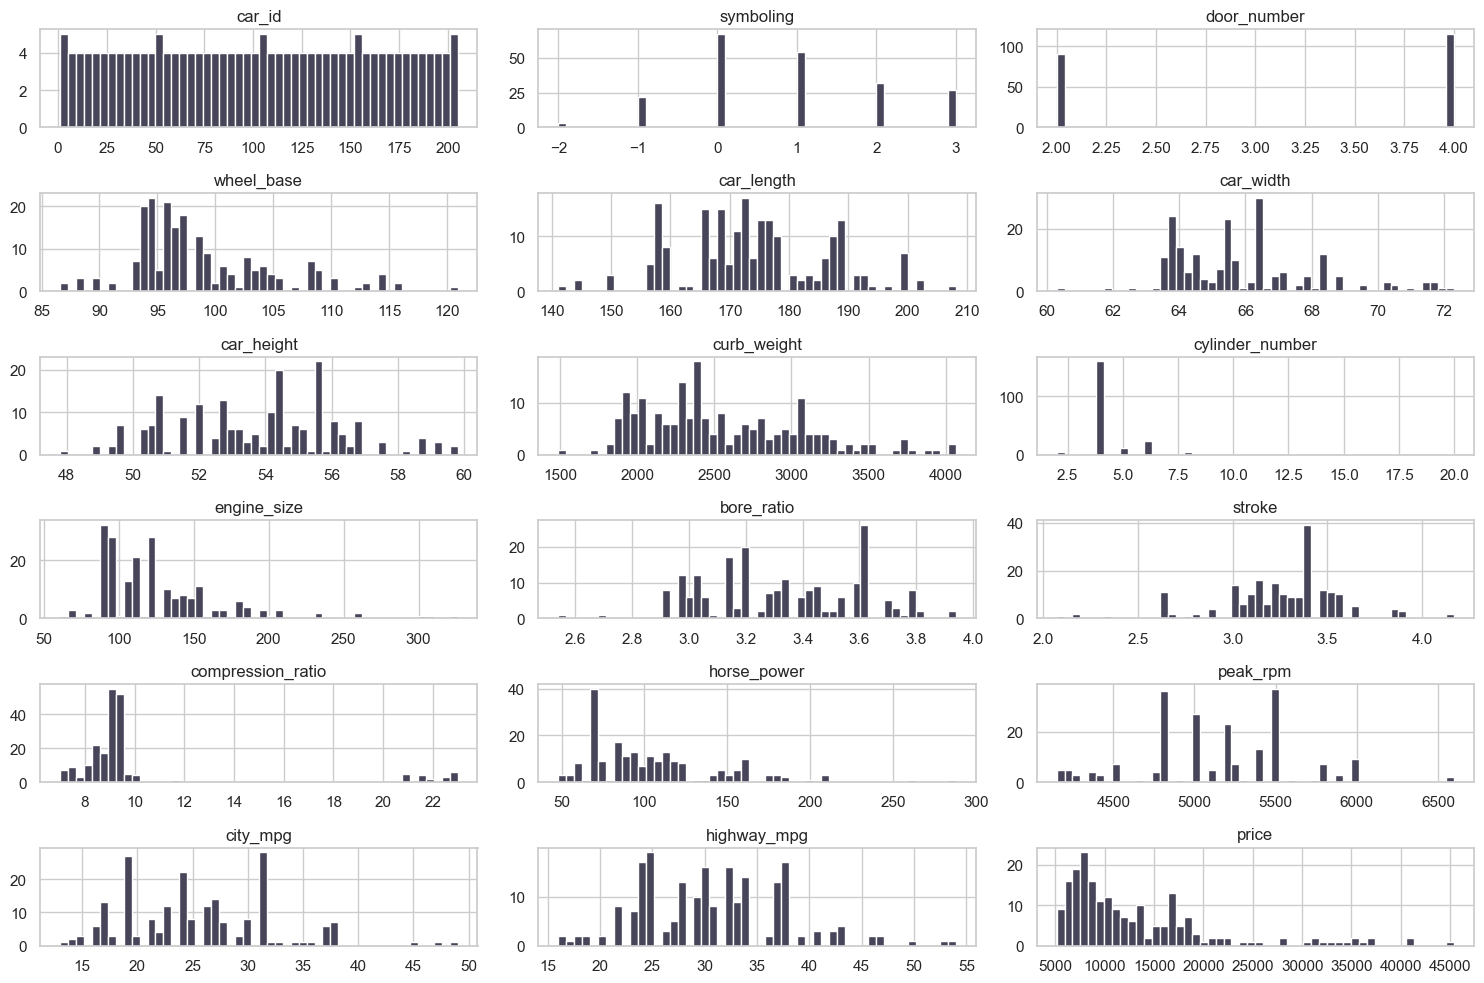

In [29]:
#Buscamos los valores atipicos (outliers) de manera visual  mediante histogramas

# Seleccionar solo las columnas numéricas del DataFrame
numeric_columns = cars.select_dtypes(include='number')

# Obtener el número de columnas numéricas
num_columns = len(numeric_columns.columns)

# Calcular el número de filas y columnas para los subplots
num_rows = (num_columns // 3) + (num_columns % 3)
num_cols = 3

# Crear subplots para cada columna numérica
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Aplanar la matriz de subplots si es necesario
axes = axes.flatten()

# Iterar sobre las columnas numéricas y crear histogramas
for i, col in enumerate(numeric_columns.columns):
    axes[i].hist(cars[col], bins=50, color='#474559', edgecolor='white')
    axes[i].set_title(col)

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar el histograma
plt.show()

#### Tamaño total en memoria

In [38]:
total_memory_size = cars.memory_usage().sum() / 1024  # Convertir a KiB
print(f"\nTamaño total en memoria: {total_memory_size:.2f} KiB")


Tamaño total en memoria: 41.77 KiB


#### Tamaño promedio de registro en memoria

In [39]:
average_record_size = total_memory_size / num_observations
print(f"Tamaño promedio de registro en memoria: {average_record_size:.2f} B")

Tamaño promedio de registro en memoria: 0.20 B


#### Conjunto de Datos Limpios

El archivo *'cleaned_dataset.csv'* representa el conjunto de datos después de aplicar técnicas de limpieza y preprocesamiento. Hemos guardado este archivo en GitHub para garantizar un acceso fácil y promover la colaboración eficiente.

In [34]:
# Guarda el archivo en local 

cars.to_csv('cleaned_dataset.csv', index=False)

#GitHub
#https://raw.githubusercontent.com/JohannaRangel/ML_MarketAnalysis-AutomotrizChina/main/data/cleaned_dataset.csv'


Utilizaremos algoritmos no supervisados para identificar las variables más relevantes. Por el momento, no procederemos a la eliminación de ninguna variable.